# **✅ Project Title: Student Performance Prediction System**

**1. Import Libraries**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import joblib

**2. Load Dataset**

In [ ]:
df = pd.read_csv("StudentsPerformance.csv")
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


**3. Data Preprocessing**

In [ ]:
# Convert categorical to numerical
le = LabelEncoder()
df['gender'] = le.fit_transform(df['gender'])
df['race/ethnicity'] = le.fit_transform(df['race/ethnicity'])
df['parental level of education'] = le.fit_transform(df['parental level of education'])
df['lunch'] = le.fit_transform(df['lunch'])
df['test preparation course'] = le.fit_transform(df['test preparation course'])

# Create Target Variable: Pass if average >= 40, else Fail
df['average_score'] = (df['math score'] + df['reading score'] + df['writing score']) / 3
df['pass'] = np.where(df['average_score'] >= 40, 1, 0)
df.drop(['average_score'], axis=1, inplace=True)

**4. Train-Test Split**

In [ ]:
X = df.drop(['pass'], axis=1)
y = df['pass']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**5. Model Training**


In [ ]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

**6. Model Evaluation**

In [ ]:
y_pred = model.predict(X_test)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[ 10   0]
 [  0 190]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00       190

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



**7. Feature Importance**

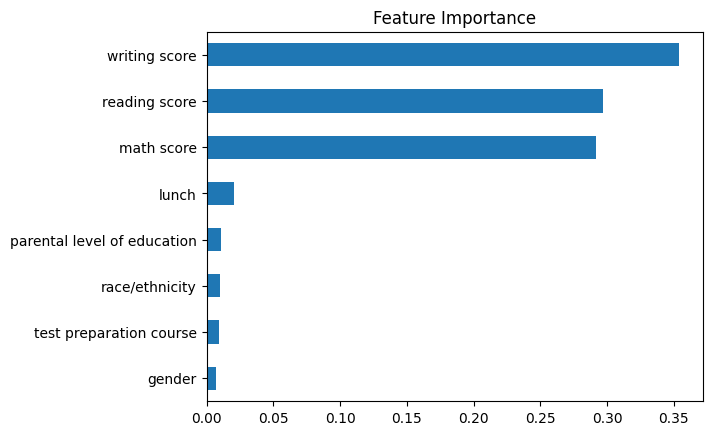

In [ ]:
feat_importance = pd.Series(model.feature_importances_, index=X.columns)
feat_importance.sort_values().plot(kind='barh')
plt.title("Feature Importance")
plt.show()

**8. Save the Model**

In [ ]:
joblib.dump(model, "student_model.pkl")

['student_model.pkl']

In [ ]:
!pip install streamlit
import streamlit as st
import joblib
import numpy as np

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 64.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 86.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 6.3 MB/s eta 0:00:00


In [ ]:
# Load the trained model
model = joblib.load("student_model.pkl")

In [ ]:
# App Title
st.title("🎓 Student Pass/Fail Prediction")

2025-06-04 04:14:58.747 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-04 04:14:58.881 
  command:

    streamlit run /usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-06-04 04:14:58.885 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


DeltaGenerator()

In [ ]:
# Collect user input
gender = st.selectbox("Gender", ["Female", "Male"])
race = st.selectbox("Race/Ethnicity", ["Group A", "Group B", "Group C", "Group D", "Group E"])
parent_edu = st.selectbox("Parental Education Level", [
    "Some High School", "High School", "Some College", "Associate's Degree", "Bachelor's Degree", "Master's Degree"])
lunch = st.selectbox("Lunch Type", ["Free/Reduced", "Standard"])
prep_course = st.selectbox("Test Preparation Course", ["None", "Completed"])
math = st.slider("Math Score", 0, 100, 50)
reading = st.slider("Reading Score", 0, 100, 50)
writing = st.slider("Writing Score", 0, 100, 50)

2025-06-04 04:14:58.900 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-04 04:14:58.903 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-04 04:14:58.904 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-04 04:14:58.905 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-04 04:14:58.908 Session state does not function when running a script without `streamlit run`
2025-06-04 04:14:58.909 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-04 04:14:58.910 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-04 04:14:58.910 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-04 04:14

In [ ]:
# Encode categorical values (same encoding as training)
gender = 1 if gender == "Male" else 0
race_dict = {"Group A": 0, "Group B": 1, "Group C": 2, "Group D": 3, "Group E": 4}
race = race_dict[race]
edu_dict = {
    "Some High School": 0, "High School": 1, "Some College": 2,
    "Associate's Degree": 3, "Bachelor's Degree": 4, "Master's Degree": 5
}
parent_edu = edu_dict[parent_edu]
lunch = 0 if lunch == "Free/Reduced" else 1
prep_course = 0 if prep_course == "None" else 1

In [ ]:
# Prediction
if st.button("Predict"):
    data = np.array([[gender, race, parent_edu, lunch, prep_course, math, reading, writing]])
    prediction = model.predict(data)
    result = "✅ Pass" if prediction[0] == 1 else "❌ Fail"
    st.subheader(f"Prediction: {result}")

2025-06-04 04:14:58.967 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-04 04:14:58.969 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-04 04:14:58.969 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-04 04:14:58.970 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-04 04:14:58.971 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


In [ ]:
!streamlit run student_streamlit_app.py




  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.170.176.66:8501

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-p

In [ ]:
!pip install pyngrok

from pyngrok import conf, ngrok

# Set your ngrok authtoken
conf.get_default().auth_token = "2xzqdJWgxNMdPFfHOXvmCdP5LmJ_2mRmG3PtakpQpuJBK7dDq"

# Kill existing tunnels (optional)
ngrok.kill()

# Start a tunnel on port 8501 (Streamlit default port)
public_url = ngrok.connect(addr="8501", proto="http")

print(f"🌐 Public link to your Streamlit app: {public_url}")

🌐 Public link to your Streamlit app: NgrokTunnel: "https://2f4a-34-170-176-66.ngrok-free.app" -> "http://localhost:8501"
